In [ ]:
#steps of project
#Make full noise spectrum
#Make comb spectrum AND add spacing and offset to the comb
####combine the spectrums but replacing full noise spectrum indices with comb spectrum (add arrays) 
#   use the "nearest" fuction to look at combs and add to appropriate place in full noise spectrum

In [67]:
import numpy as np
from matplotlib import pyplot as plt



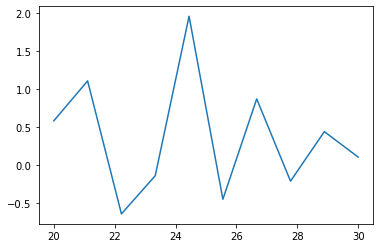

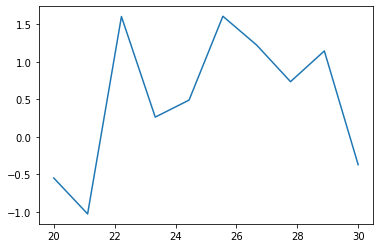

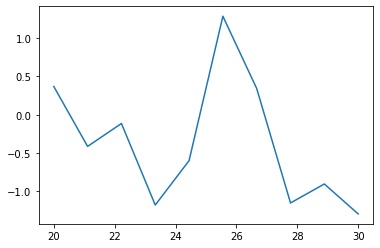

In [211]:
#spect is spectrum that was made 
def noise_spect(fmin, fmax, nf):
        freqs = np.linspace(fmin, fmax, nf) # frequencies that run from fmin to fmax, with a total of nf steps
        vals = np.random.normal(size = nf) # random values, sampled from a normal distribution
        
        plt.plot(freqs,vals)               # make a plot of the values
        plt.show()   
        
        return freqs, vals                # allows for me to use freqs and vals in the next function

freqs = noise_spect(20, 30, 10)
vals = noise_spect(20, 30, 10)
spect = noise_spect(20,30,10)

ValueError: x and y must have same first dimension, but have shapes (1,) and (5,)

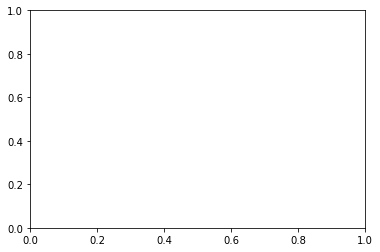

In [235]:
#comb spectrum newly made (I need to be able to call use arguement nf to multiply by all 1 array?? ) 
def comb_spect(cfmin, cfmax, cnf):
    comb_freqs = np.arange(cfmin, cfmax, cnf) #numpy functio for spacing and offsett?????
    comb_vals = (np.ones(5))              # array on 1's ???
    
    plt.plot(comb_freqs, comb_vals)             # make a plot of the values
    plt.show()   
                 
    return comb_freqs, comb_vals


comb_vals = comb_spect(20, 30, 10)
comb_freqs = comb_spect(20, 30, 10)   
comb_spect = comb_spect(20, 30, 10)

In [240]:
#marks is a set of combs with frequency spacing and offset
def marks(spacing, offset):
     
    for i in comb_freqs:
        i = i * spacing + offset
        
    print(comb_freqs)
   
marks(2, .3)

(array([20]), array([1.]))


In [228]:
# add (sum) the arrays (noise and comb) to make it into 1 array
combined_spectrum = np.add(spect, comb_spect)

plt.plot(combined_spectrum)                # make a plot of the values
plt.show()   

#rename full array to combine spectrum





TypeError: unsupported operand type(s) for +: 'float' and 'function'

In [189]:
def nearest(spect, marks):
  
    # for each bincenter, figure out the distance to next bincenter
    binwidths=np.diff(spect)

    # the rightmost bincenter nothing after it, so use the preceding binwidth
    binwidths = np.append(binwidths,binwidths[-1])

    # for each bin center, the right edge of the bin should be 1/2 of the rightward binwidth
    edges = spect + binwidths/2.

    # the leftmost bin has no left edge so use the subsequent binwidth
    edges = np.append(spect[0]-binwidths[0]/2.,edges)

    # now digitize, using the calculated bin edges
    inds = np.digitize(marks,edges)

    # subtract 1 off the results so that they correspond appropriately to the original bincenters
    inds -= 1
    
#Myrlas Comments   Define freq (spacing, offset)
#for set_of_combs find find the indices where it belongs-def nearest
#def nearest returns indices of closest bin to comb
#next task-now, atually place comb in the 
    

    # raise an exception if we got any results that aren't within the spectrum bounds.
    # (returning negative numbers will create unexpected results)

    if len(inds)>0:
        if np.amin(inds)<0 or np.amax(inds)>len(spect)-1:
            raise Exception("Not all tested values are within the spectrum bounds.")

    return inds
    
    plt.plot(spect, marks) # make a plot of the values
    plt.show()
nearest(spect, marks)

ValueError: operands could not be broadcast together with shapes (2,10) (27,) 

In [ ]:
#full noise spectrum
#comb spectrum
# add spacing and offste to comb
#combine the spectrum but replace full noise spectrum indeices with comb spectrum 
# use nearest fuction to look at combs and add to appropriate place in full noise spectrum